<a href="https://colab.research.google.com/github/songiangvn/Deep-RL-Hugging-Face/blob/main/Unit_2_Introduction_to_Q_Learning_Theory_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Q-Learning

In this unit, we’re going to d**ive deeper into one of the Reinforcement Learning methods: value-based methods** and study our first RL algorithm: **Q-Learning**

We’ll also **implement our first RL agent from scratch, a Q-Learning agent,** and will train it in two environments:

1. Frozen-Lake-v1 (non-slippery version): where our agent will need to go from the starting state (S) to the goal state (G) by walking only on frozen tiles (F) and avoiding holes (H).
2. An autonomous taxi: where our agent will need to learn to navigate a city to transport its passengers from point A to point B.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/envs.gif" alt="Environments">

Concretely, we will:

- Learn about value-based methods.
- Learn about the differences between Monte Carlo and Temporal Difference Learning.
- Study and implement our first RL algorithm: Q-Learning.

# Short Recap about RL

In RL, our goal is to find an optimal policy π* , aka., a policy that leads to the best expected cumulative reward.

And to find this optimal policy (hence solving the RL problem), there are two main types of RL methods:

- **Policy-based methods**: Train the policy directly to learn which action to take given a state.

- **Value-based methods**: Train a value function to learn which state is more valuable and use this value function to take the action that leads to it.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/two-approaches.jpg" alt="Two RL approaches">

And in this unit, we’ll **dive deeper into the value-based methods.**

# Two types of value-based methods

In value-based methods, we learn a value function that maps a state to the expected value of being at that state.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/vbm-1.jpg" alt="Value Based Methods">

> *But what does it mean to act according to our policy? After all, we don't have a policy in value-based methods since we train a value function and not a policy.*

## In policy based methods

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/two-approaches-2.jpg" alt="Two RL approaches">

 We don’t define by hand the behavior of our policy; it’s the training that will define it.

## In Value-based methods

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/two-approaches-3.jpg" alt="Two RL approaches">

 In the case of value-based methods, you don’t train the policy: your policy is just a simple pre-specified function (for instance, the Greedy Policy) that uses the values given by the value-function to select its actions.

Consequently, whatever method you use to solve your problem, you will have a policy

So the difference is:

- In policy-based training, **the optimal policy (denoted π*) is found by training the policy directly**.
- In value-based training, **finding an optimal value function (denoted Q* or V*, we’ll study the difference below) leads to having an optimal policy.**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/link-value-policy.jpg" alt="Link between value and policy">

## Two types of value-based functions

### The state-value function

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/state-value-function-1.jpg" alt="State value function">

For each state, the state-value function outputs the expected return if the agent starts at that state and then **follows the policy forever afterward (for all future timesteps, if you prefer).**

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/state-value-function-2.jpg" alt="State value function">

If we take the state with value -7: it's the expected return starting at that state and taking actions according to our policy (greedy policy), so right, right, right, down, down, right, right.

### The action value function

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/action-state-value-function-1.jpg" alt="Action State value function">

In the action-value function, for each state and action pair, the action-value function outputs the expected return if the agent starts in that state, takes that action, and then follows the policy forever after.



<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/action-state-value-function-2.jpg" alt="Action State value function">

We see that the difference is:

- For the state-value function, we calculate the value of a state *S_t*

- For the action-value function, we calculate the value of the state-action pair *(S_t, A_t)* hence the value of taking that action at that state.

In either case, whichever value function we choose (state-value or action-value function), the returned value is the expected return.

However, the problem is that to calculate EACH value of a state or a state-action pair,** we need to sum all the rewards an agent can get if it starts at that state.**

**This can be a computationally expensive process, and that’s where the Bellman equation comes in to help us.**

# The Bellman Equation: simplify our value

## Overview

The Bellman equation simplifies our state value or state-action value calculation.

What we learned so far, we know that if we calcualte V(S_t) - the value of a state, we need to calculate the return starting at that state and then follow the policy forever after. (The policy we defined in the following example is a Greedy Policy; for simplification, we don’t discount the reward).

To calculate V(S_t), we need to calculate the sum of the expected rewards. Example:

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/bellman2.jpg" alt="Bellman equation">

To calculate the value of State 1: the sum of rewards if the agent started in that state and then followed the greedy policy (taking actions that leads to the best states values) for all the time steps.

So you may have noticed, we’re repeating the computation of the value of different states, which can be tedious if you need to do it for each state value or state-action value.

Instead of calculating the expected return for each state or each state-action pair, we can use the Bellman equation. (hint: if you know what Dynamic Programming is, this is very similar!)

> **Bellman Equation** is s**imilar to Dynamic Programming**

## Details about Bellman Equation

The Bellman equation is a recursive equation that works like this: instead of starting for each state from the beginning and calculating the return, we can consider the value of any state as:

The immediate reward $R_{t+1}$ + the discounted value of the state that follows ($\gamma \cdot V(S_{t+1})$).

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/bellman4.jpg" alt="Bellman equation">

Go back to our example, to calculate the value of State 1:

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/bellman6.jpg" alt="Bellman equation">

For simplification, here we don’t discount so gamma = 1.

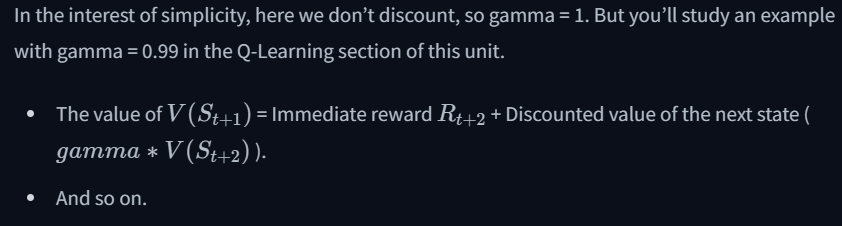

## Recap:

To recap, the idea of the Bellman equation is that instead of calculating each value as the sum of the expected return, **which is a long process**, we calculate the value as **the sum of immediate reward + the discounted value of the state that follows.**

==> Công thức là recursion

# Monte Carlo vs Temporal Difference Learning

The last thing we need to discuss before diving into Q-Learning is the two learning strategies.

Remember that an RL agent learns by interacting with its environment. The idea is that given the experience and the received reward, the agent will update its value function or policy.

Monte Carlo and Temporal Difference Learning are two different strategies on how to train our value function or our policy function. Both of them use experience to solve the RL problem.

## Monte Carlo: learning at the end of the episode

Monte Carlo waits until the end of the episode, calculates G(t) (return) and uses it as a target for updating V(S_t).

So it requires **a complete episode of interaction before updating our value function.**

=> Cần all episode, tức là chạy hết đến cuối mới bắt đầu updating value function

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/monte-carlo-approach.jpg" alt="Monte Carlo">

1. **Monte Carlo Approach**  
Monte Carlo là một phương pháp học dựa trên việc thu thập dữ liệu từ toàn bộ một tập (episode). Nó chờ đến khi tập kết thúc, sau đó tính toán tổng phần thưởng (return) $G_t$ từ thời điểm $t$ đến cuối tập.  
Giá trị $G_t$ này được sử dụng làm mục tiêu để cập nhật giá trị của trạng thái $S_t$.  

2. **Công thức cập nhật giá trị**  
Công thức cập nhật giá trị của trạng thái $S_t$ là:  
$$  
V(S_t) \leftarrow V(S_t) + \alpha \big[ G_t - V(S_t) \big]  
$$   

  **Ý nghĩa từng thành phần**:  
  - $V(S_t)$: Giá trị hiện tại của trạng thái $S_t$ (ước lượng trước đó về giá trị kỳ vọng của trạng thái này).  
  - $\alpha$: Tốc độ học (Learning Rate), xác định mức độ điều chỉnh giá trị $V(S_t)$ dựa trên sai số.  
  - $G_t$: Tổng phần thưởng (Return) từ thời điểm $t$ đến cuối tập. Đây là giá trị thực tế thu được.  
  - $G_t - V(S_t)$: Sai số giữa giá trị thực tế $G_t$ và giá trị ước lượng hiện tại $V(S_t)$. Sai số này được dùng để điều chỉnh $V(S_t)$.  

3. **Quy trình hoạt động**  
- **Thu thập dữ liệu**: Chạy một tập (episode) từ đầu đến cuối, ghi nhận các trạng thái, hành động và phần thưởng.  
- **Tính toán $G_t$**: Với mỗi trạng thái $S_t$, tính tổng phần thưởng $G_t$ từ thời điểm $t$ đến cuối tập:  
$$  
G_t = R_{t+1} + R_{t+2} + \dots + R_T  
$$  
Trong đó $R_{t+1}, R_{t+2}, \dots, R_T$ là các phần thưởng nhận được sau thời điểm $t$.  
- **Cập nhật giá trị $V(S_t)$**: Sử dụng công thức trên để điều chỉnh giá trị của trạng thái $S_t$ dựa trên $G_t$.

### Example:

We always start the episode at the same starting point.

The agent takes actions using the policy. For instance, using an Epsilon Greedy Strategy, a policy that alternates between exploration (random actions) and exploitation.

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/MC-3p.jpg" alt="Monte Carlo">

For instance, if we train a state-value function using Monte Carlo:

- We initialize our value function so that it returns 0 value for each state

- Our learning rate (lr) is 0.1 and our discount rate is 1 (= no discount)

- Our mouse explores the environment and takes random actions

- The mouse made more than 10 steps, so the episode ends .

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/MC-5p.jpg" alt="Monte Carlo">

Note: Nói chung cái này là chạy nhiều lần cả 1 episode để dần dần đưa V(S_t) về giá trị thật

## Temporal Difference Learning: learning at each step

### Temporal Difference (TD)  

Temporal Difference, ngược lại với Monte Carlo, chỉ chờ **một tương tác duy nhất** (một bước) $S_{t+1}$ để hình thành mục tiêu TD (TD target) và cập nhật $V(S_t)$ bằng cách sử dụng $R_{t+1}$ và $\gamma \cdot V(S_{t+1})$.  

Công thức cập nhật giá trị của TD là:  

$$  
V(S_t) \leftarrow V(S_t) + \alpha \big[ R_{t+1} + \gamma \cdot V(S_{t+1}) - V(S_t) \big]  
$$  

---  

### Ý tưởng chính của TD  

- TD cập nhật giá trị $V(S_t)$ **sau mỗi bước**.  
- Vì không trải qua toàn bộ một tập (episode), chúng ta không có $G_t$ (tổng phần thưởng kỳ vọng).  
- Thay vào đó, TD **ước lượng $G_t$** bằng cách cộng $R_{t+1}$ (phần thưởng ngay lập tức) và giá trị chiết khấu của trạng thái tiếp theo $\gamma \cdot V(S_{t+1})$.  

---  

### Bootstrapping  

Quá trình này được gọi là **bootstrapping**.  
- Lý do là vì TD dựa một phần vào **ước lượng hiện tại** $V(S_{t+1})$ thay vì sử dụng toàn bộ mẫu $G_t$ (như trong Monte Carlo).  
- Điều này giúp TD cập nhật nhanh hơn và không cần chờ đến khi tập kết thúc.  

---  


<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/TD-1.jpg" alt="Temporal Difference">

This method is called **one-step TD** or **TD(0)**

### Example:

- We initialize our value function so that it returns 0 value for each state.

- Our learning rate (lr) is 0.1, and our discount rate is 1 (no discount).

- Our mouse begins to explore the environment and takes a random action: going to the left

- It gets a reward $R_{t+1} = 1$ since it eats a piece of cheese

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/TD-3p.jpg" alt="Temporal Difference">

### So sánh với Monte Carlo  

| **Phương pháp**       | **Monte Carlo**                              | **Temporal Difference (TD)**               |  
|------------------------|----------------------------------------------|---------------------------------------------|  
| **Cập nhật giá trị**   | Sau khi tập kết thúc                        | Sau mỗi bước                                |  
| **Dữ liệu cần thiết**  | Toàn bộ tập (episode)                       | Một bước (step)                             |  
| **Dựa trên**           | Tổng phần thưởng $G_t$                     | Phần thưởng $R_{t+1}$ và giá trị $V(S_{t+1})$ |  
| **Bootstrapping**      | Không                                       | Có                                         |

## Summarize

- With Monte Carlo, we update the value function from a complete episode, and so we use the **actual accurate discounted return of this episode.**

- With TD Learning, we update the value function from a step, and we replace $G_t$
 , which we don’t know, with **an estimated return called the TD target.**

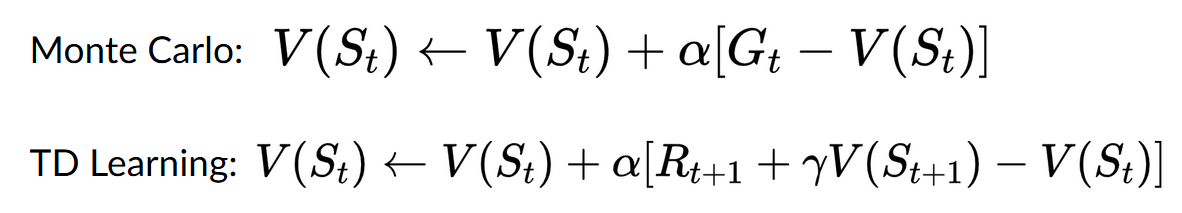

# Mid-way Recap

Before diving into Q-Learning, let’s summarize what we’ve just learned.

We have two types of value-based functions:

- State-value function: outputs the expected return if **the agent starts at a given state and acts according to the policy forever after.**
- Action-value function: outputs the expected return if **the agent starts in a given state, takes a given action at that state** and then acts accordingly to the policy forever after.
- In value-based methods, rather than learning the policy, **we define the policy by hand** and we learn a value function. If we have an optimal value function, we **will have an optimal policy**.

There are two types of methods to update the value function:

- With the Monte Carlo method, we update the value function from a complete episode, and so we **use the actual discounted return of this episode**.
- With the TD Learning method, we update the value function from a step, replacing the unknown $G_t$ with **an estimated return called the TD target**.

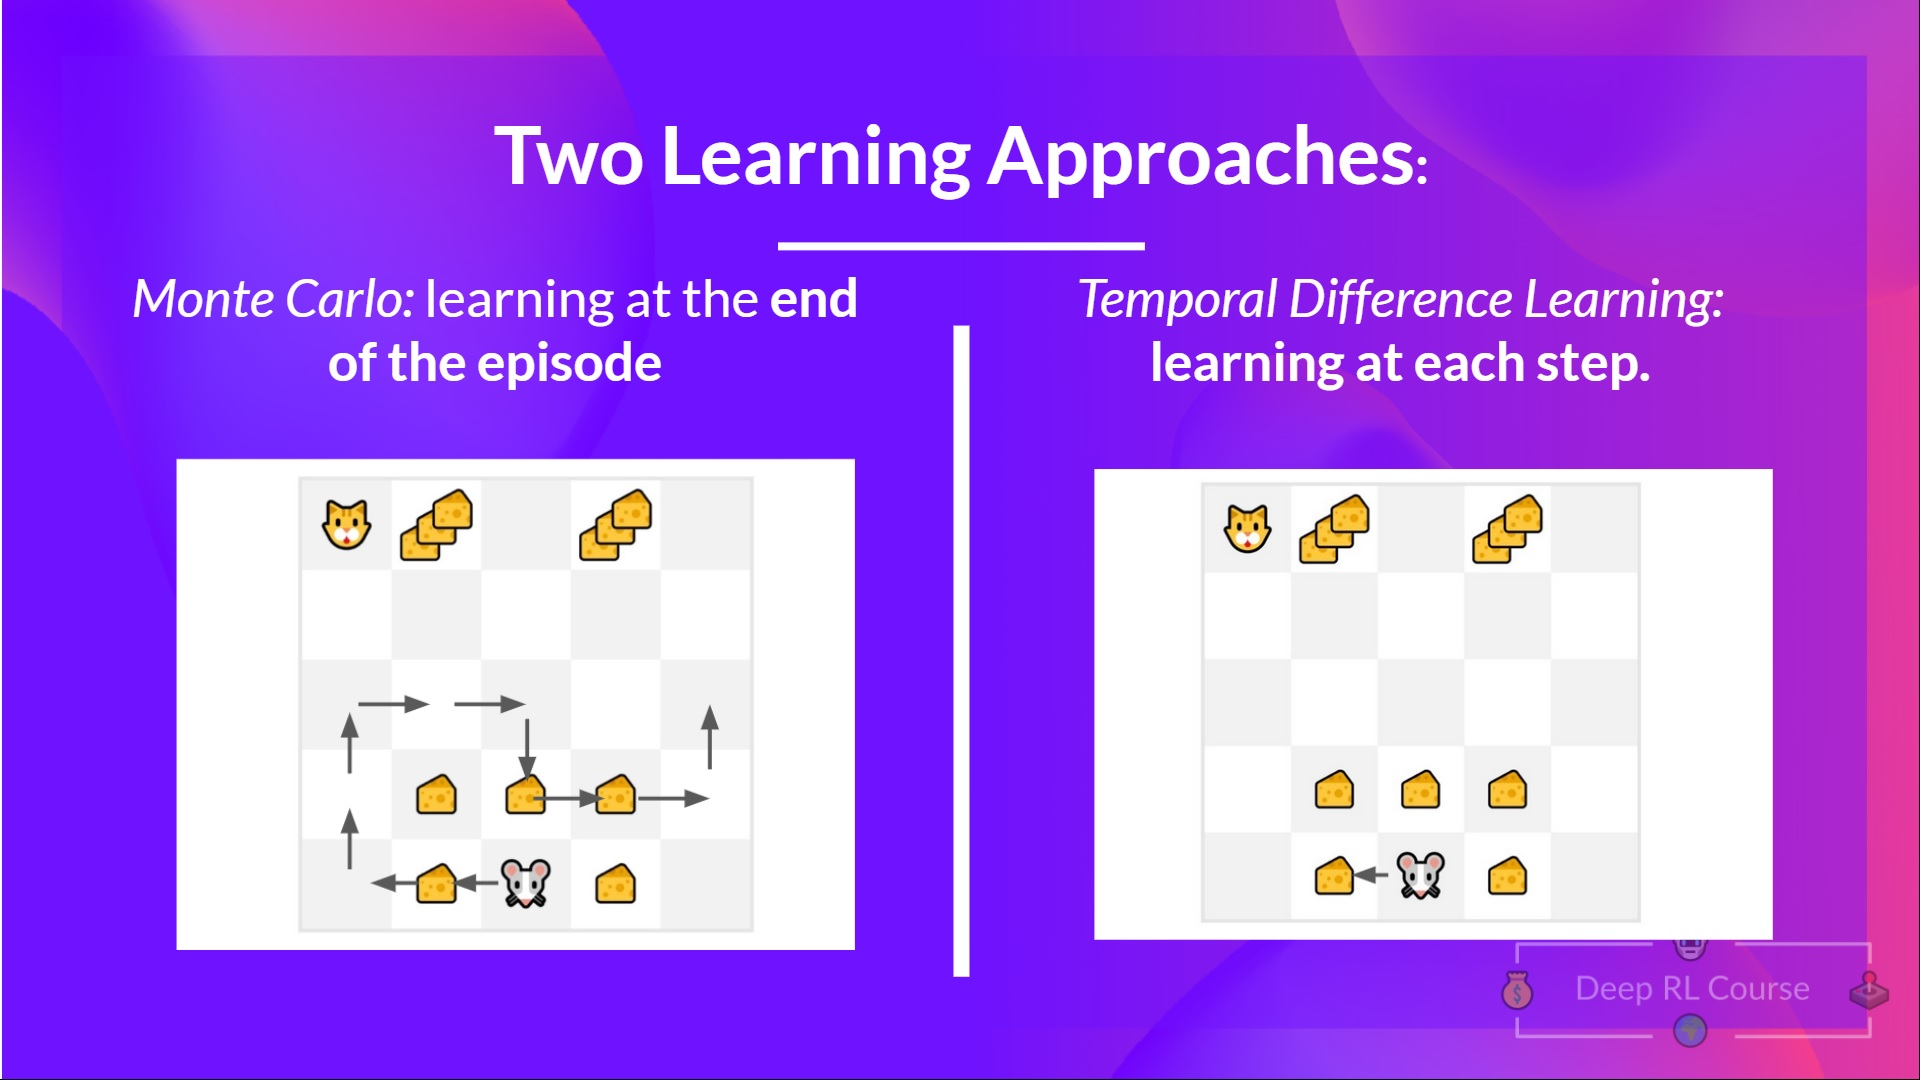